<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_fev_2020/blob/master/02_Mahotas_fracionado_fev_18_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

In [0]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']
Prop=Escolha[1] # Propriedade a escolher para ter picos, largura de pico, proeminencia,...

In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy import stats
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy import integrate
import re
import Go2BlackWhite
import Go2Mahotas
%matplotlib inline

In [5]:

Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
''' '''

' '

In [0]:
Transfere='Fotos9Amostras.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

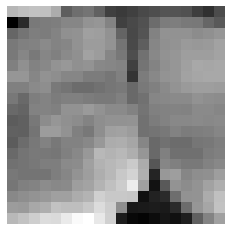

In [7]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[539], cmap = "gray")

In [0]:
NumFotos=len(img_name)
Nomes_Mahotas=['ASM','constrast','correl','variance','inv diff mom','sum aveg',
       'sum var','sum entropy','entropy','dif var','dif entropy','IMC1',
       'IMC2']

In [9]:
Num,Row,Col=np.asarray(ww).shape
Idx=[]
New_Colunm=[]

for i in range(Num):
  Media=np.mean(ww[i])
  k=np.where(ww[i].ravel() > Media)
  Idx.append(np.asarray(k).ravel())

Quant=Size*Size
for i in Idx:
  #print(i)
  New_Colunm.append(len(i)/Quant)
print(New_Colunm)

[0.48, 0.4725, 0.39, 0.435, 0.3625, 0.3675, 0.4825, 0.475, 0.515, 0.4975, 0.5, 0.6275, 0.49, 0.5425, 0.4325, 0.4625, 0.4475, 0.6575, 0.5325, 0.4125, 0.5325, 0.39, 0.5175, 0.48, 0.5625, 0.4675, 0.44, 0.54, 0.465, 0.4975, 0.5575, 0.54, 0.46, 0.48, 0.4475, 0.455, 0.3275, 0.4325, 0.4025, 0.4575, 0.5, 0.46, 0.63, 0.4325, 0.505, 0.4425, 0.4425, 0.485, 0.5, 0.5125, 0.5575, 0.4875, 0.43, 0.5625, 0.4475, 0.4625, 0.395, 0.515, 0.4925, 0.4725, 0.4125, 0.41, 0.4225, 0.4825, 0.53, 0.49, 0.38, 0.405, 0.4125, 0.41, 0.53, 0.5775, 0.4675, 0.4675, 0.5, 0.51, 0.53, 0.485, 0.4775, 0.5275, 0.495, 0.5525, 0.48, 0.5275, 0.4325, 0.4575, 0.5475, 0.56, 0.535, 0.5, 0.51, 0.525, 0.44, 0.435, 0.5125, 0.39, 0.565, 0.5075, 0.485, 0.4825, 0.3775, 0.5275, 0.5475, 0.5325, 0.58, 0.4275, 0.41, 0.5175, 0.5225, 0.44, 0.4375, 0.395, 0.535, 0.555, 0.4825, 0.4325, 0.4625, 0.4525, 0.495, 0.4925, 0.3625, 0.375, 0.355, 0.4075, 0.405, 0.465, 0.4575, 0.4725, 0.4825, 0.4375, 0.585, 0.5325, 0.57, 0.4775, 0.4425, 0.4025, 0.45, 0.4625

In [10]:
print(len(New_Colunm))

540


In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [0]:
#foto 0 (k=0)
'''
Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
'''
Todas_Fotos=[] 
# Todas_Fotos tem os valores medio da propriedade cada linha representa 
# uma foto e cada coluna as subdivisoes da foto
for k in range(NumFotos):
  Prop_Escolhida=[]
  #p_foto=ww[k,:].reshape(Size,Size)
  p_foto=ww[k].reshape(Size,Size)
  GLCM=[]
  glcm_haralick=[]
  x_ref=[]
  Count=Sub_Size
  p=np.zeros((Sub_Size,Sub_Size))
  j_ref=0
  Cada_foto=[]
  Posicao_X=[]
  Posicao_Y=[]
  for k in range(Size):
    if((k+Sub_Size-1)<Size):
      #print("(k+Sub_Size)=",(k+Sub_Size),"k=",k)
      for i in range(Sub_Size):
        Posicao_X.append(Crop+i)
        for j in range(Sub_Size):
          p[i,j]=p_foto[Crop+i,j+k]
          Posicao_Y.append(j+k)

      WW=np.copy(p) 
      Cada_foto.append(WW.ravel())
      x_ref.append(Count-Sub_Size)
      Count=Count+1
     
      Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Escolha)
      Prop_Escolhida.append(Mahotas[Prop].mean())
      '''
      GLCM=[]
      for ii in Escolha:
        GLCM.append(Mahotas[ii].mean())
        #print('cheguei aqui!!!')
      glcm_haralick.append(GLCM)
      '''
  Todas_Fotos.append(Prop_Escolhida)

df=pd.DataFrame(Todas_Fotos)



In [17]:
print(df)

              0            1           2   ...           14           15          16
0      15.805556    59.854167   90.243056  ...    22.236111   221.625000  263.694444
1     334.513889   166.770833   21.409722  ...   160.145833   162.298611  266.145833
2      36.465278    73.875000  118.305556  ...   169.034722   264.666667  309.222222
3      77.875000   403.062500  868.902778  ...    32.930556   123.861111  439.076389
4      30.006944    13.534722   20.555556  ...   343.784722   177.465278  235.729167
..           ...          ...         ...  ...          ...          ...         ...
535   632.069444   513.083333  294.055556  ...   144.708333   129.006944  148.722222
536  1858.451389  1918.118056  810.284722  ...  2254.291667  1501.819444  774.548611
537    57.263889    80.770833   87.458333  ...    19.097222    23.743056   37.451389
538    69.125000    89.659722  107.888889  ...    11.131944    15.027778   16.284722
539    68.451389    84.868056   80.138889  ...    29.826389    23

In [13]:
# print(len(GLCM)) # uma foto media dos angulos
# print(df) # df uma foto
print(Mahotas)


        ASM  constrast    correl  ...  dif entropy      IMC1      IMC2
0  0.065972   7.416667  0.814953  ...     2.125815 -0.728814  0.995476
1  0.067901  11.000000  0.649558  ...     2.197160 -0.765247  0.996244
2  0.041667  18.500000  0.516691  ...     2.355389 -0.598751  0.990013
3  0.055556  31.111111  0.156062  ...     2.419382 -0.712628  0.995044

[4 rows x 13 columns]


In [14]:
print(len(Cada_foto[0])) # Cada_foto contem a foto pequena varida
print(np.array(Cada_foto).shape)

16
(17, 16)


In [15]:
print(Cada_foto[0])

[ 96.  98. 110. 120.  99.  98. 108. 128.  96. 104. 110. 115. 103. 108.
 111. 110.]


In [18]:
print(NumFotos)

540


In [27]:
# esta parte calcula picos, area abaixo da curva antes ela precisa gerar 
# o dataframe que contem a propriedade escolhida com uma foto em cada linha ....
for i in range(NumFotos):
  x=df.iloc[i]
  peaks, rr = find_peaks(x, height=0)

  N_peaks=len(peaks)
  prominences = peak_prominences(x, peaks)
  Media_proem=np.mean(prominences)
  #Area = simps(x, dx=1)
  Area = integrate.simps(x, dx=1)
  Width_peaks =np.mean(peak_widths(x, peaks, rel_height=0.5))
  Width_peaks_max =np.max(peak_widths(x, peaks, rel_height=0.5))
  Width_peaks_min =np.min(peak_widths(x, peaks, rel_height=0.5))
  Median = np.median(x)
  Mode= stats.mode(x)[0]
  Mean=np.mean(x)
  Sd=np.std(x)

  Features=[]
  Features.append(N_peaks)
  Features.append(Media_proem )
  Features.append(Area)
  Features.append(Width_peaks )
  Features.append(Width_peaks_max)
  Features.append(Width_peaks_min)
  Features.append(Median )
  Features.append(Mode[0])
  Features.append(Mean)
  Features.append(Sd)

  Nomes_Fracionada=['N_peaks','Media_proem','Area','Width_peaks','Width_peaks_max',
                    'Width_peaks_min','Median','Mode','Mean','Sd'] 
  
  Features=pd.DataFrame(Features,index=Nomes_Fracionada)
  #matriz_x_b[i,:]=np.array(Features.loc[:,0])

NameError: ignored

In [28]:
print(Features)

                           0
N_peaks             2.000000
Media_proem        21.739583
Area             1024.861111
Width_peaks        14.813687
Width_peaks_max    54.423611
Width_peaks_min     0.876714
Median             41.708333
Mode               15.805556
Mean               66.996324
Sd                 68.468751


In [0]:
print(Features)

In [0]:
# find df texture for a given picture
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name)
print(df)

In [0]:
row_b,col=df_b.shape # pega quantas fotos tem

In [0]:
print(len(New_Colunm))

In [0]:
j=0
cont=-1
Posicao_Buraco=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
j=0
cont=-1
Posicao_Grao=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)

j=0
cont=-1
Posicao_Indef=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)

# print(Posicao_Grao)
# print(Posicao_Buraco)
# print(Posicao_Indef)


In [0]:
print(np.asarray(New_Colunm)[Posicao_Buraco])

In [0]:

# compara constrast dos tres primeiros buracos
Num=len(Posicao_Buraco)
Matriz_X_Buraco=[]
#Efeito_escuro=[]
#Num=3
for i in range(Num):
  k=Posicao_Buraco[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Buraco.append(np.array(df[Prop]).ravel())
Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco)

In [0]:
Row,Col=Contraste_Buraco.shape
New=np.asarray(New_Colunm)[Posicao_Buraco]
#Matriz_New = np.hstack(Matriz_X_Buraco,New)
#print(Matriz_New)
Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco)
Contraste_Buraco[Col]=New
print(Contraste_Buraco)

In [0]:
# compara constrast dos graos
Num=len(Posicao_Grao)
Matriz_X_Grao=[]
for i in range(Num):
  k=Posicao_Grao[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Grao.append(np.array(df['constrast']).ravel())

Contraste_Grao=pd.DataFrame(Matriz_X_Grao)

In [0]:
Row,Col=Contraste_Buraco.shape
New=np.asarray(New_Colunm)[Posicao_Grao]
Contraste_Grao[Col]=New
print(Contraste_Grao)

In [0]:
# compara constrast dos indefinidos
Num=len(Posicao_Indef)
Matriz_X_Indef=[]
for i in range(Num):
  k=Posicao_Indef[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Indef.append(np.array(df['constrast']).ravel())

Contraste_Indef=pd.DataFrame(Matriz_X_Indef)

In [0]:
Row,Col=Contraste_Indef.shape
New=np.asarray(New_Colunm)[Posicao_Indef]
Contraste_Indef[Col]=New
print(Contraste_Indef)

In [0]:
print(Contraste_Buraco.head(15))

In [0]:
print(Contraste_Grao.head(15))

In [0]:
print(Contraste_Indef.head(15))

In [0]:
# found drive
from google.colab import drive
drive.mount('drive')

In [0]:
# get csv file
Contraste_Buraco.to_csv('Contraste_Buraco_01_jan_2020.csv')

In [0]:
# get csv file
Contraste_Grao.to_csv('Contraste_Grao_01_jan_2020.csv')

In [0]:
# get csv file
Contraste_Indef.to_csv('Contraste_Indef_01_jan_2020.csv')

In [0]:
# save in drive
!cp Contraste_Buraco_01_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Grao_01_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Indef_01_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/